# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
!pip install scikit-learn gensim nltk
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.decomposition import PCA
nltk.download('stopwords')
nltk.download('punkt')
'''
MultinominalNB,
SVM,
KNN,
DecisionTree,
RandomForest,
XGBoost,
Word2Vec,
BERT,
'''

from google.colab import drive
drive.mount('drive', force_remount=True)

train_review = []
test_review = []

with open("/content/drive/My Drive/exercise09_datacollection/stsa-train.txt") as tr_reviews:
  train_review = [[int(review[:2].rstrip()),review.rstrip()[2:len(review)]] for review in tr_reviews]

with open("/content/drive/My Drive/exercise09_datacollection/stsa-test.txt") as te_reviews:
  test_review = [[int(review[:2].rstrip()),review.rstrip()[2:len(review)]] for review in te_reviews]

df_train = pd.DataFrame(train_review, columns=["Sentiment","Review"])
df_test = pd.DataFrame(test_review, columns=["Sentiment","Review"])

#preprocessing
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    #apparently removing stopwords lower the evaluation scores
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
    return text

df_train["Review"] = df_train["Review"].apply(preprocess)
df_test["Review"] = df_test["Review"].apply(preprocess)

df_train_X = df_train["Review"]
df_train_Y = df_train["Sentiment"]
df_test_X = df_test["Review"]
df_test_Y = df_test["Sentiment"]

#sample reviews to play with later
sample_reviews = [
    'This idea is deeply flawed. Children do not lightly separate from their parents – and certainly not on the evidence provided here, where the great parental sin is not paying attention to their kid at the dinner table.',
    'I have no idea why Rob Reiner, or anyone else, wanted to make this story into a movie, and close examination of the film itself is no help.',
    'From shimmering waterfalls to ancient ruins, the cinematography transports us to a world where imagination knows no bounds. The CGI-rendered dragon, affectionately named Drizzle, is a marvel to behold',
    'The film’s plot resembles Swiss cheese—full of holes. Dr. Quantum’s motivation? Unclear. The time-travel mechanism? A mix of quantum foam and unicorn tears. By the third act, I was convinced the script was generated by a caffeinated AI'
]

sample_reviews = [preprocess(review) for review in sample_reviews]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at drive


In [ ]:
#MultinominalNB
#count_vect = CountVectorizer(stop_words="english") # the accuracy dropped with stop_words on
count_vect = CountVectorizer()

X_train_count = count_vect.fit_transform(df_train_X)
model_mnb = MultinomialNB()
model_mnb.fit(X_train_count, df_train_Y)

#model prediction
predictions = model_mnb.predict(count_vect.transform(df_test_X))

model_mnb_score = cross_val_score(model_mnb, X_train_count, df_train_Y, cv=10)
print("Mean cross-validation score")
#[print(f"{score}".format(score=score)) for score in model_mnb_score]
print(model_mnb_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
reviews_count = count_vect.transform(sample_reviews)
print(model_mnb.predict(reviews_count))


Mean cross-validation score
0.7839691575416378

--ACCURACY--

Accuracy score againts the test dataset:
0.8061504667764964

--RECALL--

Recall score againts the test dataset:
0.8426842684268426

--PRECISION--

Precision score againts the test dataset:
0.7848360655737705

--F-1 SCORE--

F-1 score againts the test dataset:
0.8127320954907162

--TEST THE MODEL--

[1 1 1 0]


In [ ]:
#SVM
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(df_train_X)

model_svm = SVC(kernel="linear")
model_svm.fit(X_train_count, df_train_Y)

predictions = model_svm.predict(count_vect.transform(df_test_X))

model_svm_score = cross_val_score(model_svm, X_train_count, df_train_Y, cv=10)
print("Mean cross-validation score")
print(model_svm_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
reviews_count = count_vect.transform(sample_reviews)
print(model_svm.predict(reviews_count))



Mean cross-validation score
0.7611062546531374

--ACCURACY--

Accuracy score againts the test dataset:
0.7666117517847336

--RECALL--

Recall score againts the test dataset:
0.7942794279427943

--PRECISION--

Precision score againts the test dataset:
0.7520833333333333

--F-1 SCORE--

F-1 score againts the test dataset:
0.7726056714820759

--TEST THE MODEL--

[1 1 1 1]


In [ ]:
#KNN
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(df_train_X)

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_count, df_train_Y)

predictions = model_knn.predict(count_vect.transform(df_test_X))

model_knn_score = cross_val_score(model_knn, X_train_count, df_train_Y, cv=10)
print("Mean cross-validation score")
print(model_knn_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
reviews_count = count_vect.transform(sample_reviews)
print(model_knn.predict(reviews_count))

Mean cross-validation score
0.5107699739842568

--ACCURACY--

Accuracy score againts the test dataset:
0.5090609555189456

--RECALL--

Recall score againts the test dataset:
0.08360836083608361

--PRECISION--

Precision score againts the test dataset:
0.5547445255474452

--F-1 SCORE--

F-1 score againts the test dataset:
0.14531548757170173

--TEST THE MODEL--

[0 0 0 0]


In [ ]:
#Decision Tree
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(df_train_X)

model_dc = DecisionTreeClassifier()
model_dc.fit(X_train_count, df_train_Y)

predictions = model_dc.predict(count_vect.transform(df_test_X))

model_dc_score = cross_val_score(model_dc, X_train_count, df_train_Y, cv=10)
print("Mean cross-validation score")
print(model_dc_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
reviews_count = count_vect.transform(sample_reviews)
print(model_dc.predict(reviews_count))

Mean cross-validation score
0.6742902135633203

--ACCURACY--

Accuracy score againts the test dataset:
0.6831411312465678

--RECALL--

Recall score againts the test dataset:
0.6754675467546755

--PRECISION--

Precision score againts the test dataset:
0.6852678571428571

--F-1 SCORE--

F-1 score againts the test dataset:
0.6803324099722992

--TEST THE MODEL--

[1 0 1 0]


In [ ]:
#Random Forest
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(df_train_X)

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train_count, df_train_Y)

predictions = model_rf.predict(count_vect.transform(df_test_X))

model_rf_score = cross_val_score(model_rf, X_train_count, df_train_Y, cv=10)
print("Mean cross-validation score")
print(model_rf_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
reviews_count = count_vect.transform(sample_reviews)
print(model_rf.predict(reviews_count))

Mean cross-validation score
0.7425832127351664

--ACCURACY--

Accuracy score againts the test dataset:
0.7495881383855024

--RECALL--

Recall score againts the test dataset:
0.7260726072607261

--PRECISION--

Precision score againts the test dataset:
0.7612456747404844

--F-1 SCORE--

F-1 score againts the test dataset:
0.7432432432432433

--TEST THE MODEL--

[1 0 1 0]


In [ ]:
#XBOOST
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(df_train_X)

model_xgboost = xgb.XGBClassifier()
model_xgboost.fit(X_train_count, df_train_Y)

predictions = model_xgboost.predict(count_vect.transform(df_test_X))

model_xgboost_score = cross_val_score(model_xgboost, X_train_count, df_train_Y, cv=10)
print("Mean cross-validation score")
print(model_xgboost_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
reviews_count = count_vect.transform(sample_reviews)
print(model_xgboost.predict(reviews_count))

Mean cross-validation score
0.7172642898371298

--ACCURACY--

Accuracy score againts the test dataset:
0.7062053816584294

--RECALL--

Recall score againts the test dataset:
0.8063806380638063

--PRECISION--

Precision score againts the test dataset:
0.6712454212454212

--F-1 SCORE--

F-1 score againts the test dataset:
0.7326336831584207

--TEST THE MODEL--

[1 0 1 0]


In [ ]:
#https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/#Word2Vec_for_text_classification
#Word2Vec + LogisticRegression
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
nltk.download('punkt')

tokens = [word_tokenize(text) for text in df_train_X]
#tokens_test = [word_tokenize(text) for text in df_test_X]

w2v_model = Word2Vec(tokens, window=5, min_count=5, workers=4)

# Vectorize the text data
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

train_X = np.array([vectorize(sentence) for sentence in df_train_X])
test_X = np.array([vectorize(sentence) for sentence in df_test_X])
reviews = np.array([vectorize(review) for review in sample_reviews])

# Train a classification model
model_logreg = LogisticRegression()
model_logreg.fit(train_X, df_train_Y)

predictions = model_logreg.predict(test_X)

model_logreg_score = cross_val_score(model_logreg, train_X, df_train_Y, cv=10)
print("Mean cross-validation score")
print(model_logreg_score.mean())

# Evaluate accuracy
print("\n--ACCURACY--\n")
accuracy = accuracy_score(df_test_Y, predictions)
print(f"Accuracy score againts the test dataset:\n{accuracy}")

print("\n--RECALL--\n")
recall = recall_score(df_test_Y, predictions)
print(f"Recall score againts the test dataset:\n{recall}")

print("\n--PRECISION--\n")
precision = precision_score(df_test_Y, predictions)
print(f"Precision score againts the test dataset:\n{precision}")

print("\n--F-1 SCORE--\n")
f1 = f1_score(df_test_Y, predictions)
print(f"F-1 score againts the test dataset:\n{f1}")

#testing
print("\n--TEST THE MODEL--\n")
print(model_logreg.predict(reviews))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mean cross-validation score
0.5342209497837599

--ACCURACY--

Accuracy score againts the test dataset:
0.5172981878088962

--RECALL--

Recall score againts the test dataset:
0.9735973597359736

--PRECISION--

Precision score againts the test dataset:
0.5086206896551724

--F-1 SCORE--

F-1 score againts the test dataset:
0.6681766704416762

--TEST THE MODEL--

[1 1 1 1]


In [ ]:
#BERT
!pip install transformers
!pip install stop_words

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
#from pytorch_pretrained_bert import BertTokenizer, BertConfig
#from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=12ac551e74fd6cff9156196d26476939b607e633bfcc6bffd64f0ae12318b255
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words
Loading BERT tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
MAX_LEN = 128

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

sentences = df_train_X
labels = list(df_train_Y)

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_LEN,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
#print('Original: ', sentences[0])
#print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

5,528 training samples
1,383 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    return_dict=False
)

# Tell pytorch to run this model on the GPU.
model.cuda()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
import numpy as np

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        #print(loss, logits, b_input_ids)
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    346.    Elapsed: 0:00:14.
  Batch    80  of    346.    Elapsed: 0:00:27.
  Batch   120  of    346.    Elapsed: 0:00:39.
  Batch   160  of    346.    Elapsed: 0:00:52.
  Batch   200  of    346.    Elapsed: 0:01:05.
  Batch   240  of    346.    Elapsed: 0:01:19.
  Batch   280  of    346.    Elapsed: 0:01:33.
  Batch   320  of    346.    Elapsed: 0:01:47.

  Average training loss: 0.62
  Training epcoh took: 0:01:56

Running Validation...
  Accuracy: 0.82
  Validation Loss: 0.42
  Validation took: 0:00:11

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    346.    Elapsed: 0:00:14.
  Batch    80  of    346.    Elapsed: 0:00:28.
  Batch   120  of    346.    Elapsed: 0:00:41.
  Batch   160  of    346.    Elapsed: 0:00:55.
  Batch   200  of    346.    Elapsed: 0:01:09.
  Batch   240  of    346.    Elapsed: 0:01:23.
  Batch   280  of    346.    Elapsed: 0:01:37.
  Batch   320  of    346.    Elapsed: 0:01:50.

  Averag

In [ ]:
#sentences = test_df.text.values
#labels = test_df.category.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = MAX_LEN,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )


    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-12-361001c51a5f>:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


In [ ]:
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 6,911 test sentences...
    DONE.


In [ ]:
from functools import reduce
scores = reduce(lambda x,y: x+y,[list(map(np.argmax,p)) for p in predictions])
labels = reduce(lambda x,y: list(x) + list(y), true_labels)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(scores, labels)

0.9340182318043698

In [ ]:
print(classification_report(scores, labels))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3307
           1       0.94      0.94      0.94      3604

    accuracy                           0.93      6911
   macro avg       0.93      0.93      0.93      6911
weighted avg       0.93      0.93      0.93      6911



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.tokenize import word_tokenize

from google.colab import drive
drive.mount('drive', force_remount=True)

#with open("/content/drive/My Drive/Amazon_Unlocked_Mobile") as rev:
phone_review = pd.read_csv("/content/drive/My Drive/Amazon_Unlocked_Mobile.csv")

print([phone_review.shape])

#sampling
phone_review = phone_review.head(10000)

print([phone_review.shape])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mounted at drive
[(413840, 6)]
[(10000, 6)]


In [ ]:
#preprocessing

phone_review = phone_review.dropna()

#remove duplicate if any
sorted_data=phone_review.sort_values("Product Name", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
phone_review=sorted_data.drop_duplicates(subset={"Product Name","Brand Name","Price","Rating","Reviews","Review Votes"}, keep='first', inplace=False)

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

phone_review["Reviews"] = phone_review["Reviews"].apply(preprocess)

phone_review.shape

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = phone_review["Rating"]
positiveNegative = actualScore.map(partition)
phone_review["Score"] = positiveNegative

phone_review.head()

<ipython-input-17-d830c56453a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_review["Reviews"] = phone_review["Reviews"].apply(preprocess)
<ipython-input-17-d830c56453a4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phone_review["Score"] = positiveNegative


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Score
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone us used hard phone...,1.0,positive
21,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,prosbeautiful screencapable running chrometake...,0.0,positive
22,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,purchased phone december christmas present son...,19.0,negative
23,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,phone good little slow phone old great phone t...,0.0,positive
24,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,phones speaker little low overall happy phone ...,0.0,positive


In [ ]:
#k-means
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

n_cluster = 10
count_vect = TfidfVectorizer()

X_train_count = count_vect.fit_transform(phone_review["Reviews"])
kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init="auto").fit(X_train_count)
labels = kmeans.predict(X_train_count)

print("Cluster labels:", kmeans.labels_)
#print("Predicted clusters for new data:", kmeans.predict(count_vect.transform(df_test_X)))
#print("Cluster centers:", kmeans.cluster_centers_)

print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

terms = count_vect.get_feature_names_out()
for i in range(n_cluster):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind], end='')
        print()

#df = phone_review
#df['Bow Clus Label'] = kmeans.labels_

#plt.bar([x for x in range(n_cluster)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
#plt.title('KMeans cluster points')
#plt.xlabel("Cluster number")
#plt.ylabel("Number of points")
#plt.show()



Cluster labels: [8 5 8 ... 8 5 5]
Top terms per cluster:
Cluster 0: work
 didnt
 doesnt
 phone
 button
Cluster 1: new
 brand
 like
 phone
 came
Cluster 2: works
 great
 phone
 well
 good
Cluster 3: good
 phone
 product
 condition
 far
Cluster 4: great
 phone
 price
 product
 condition
Cluster 5: excellent
 product
 perfect
 good
 thanks
Cluster 6: iphone
 phone
 great
 new
 good
Cluster 7: love
 phone
 great
 works
 thanks
Cluster 8: phone
 great
 would
 use
 bought
Cluster 9: phone
 screen
 good
 great
 price


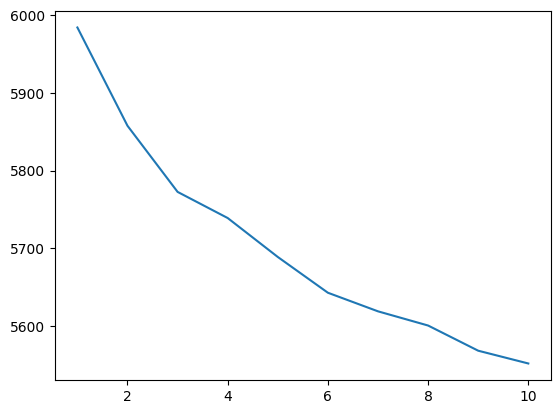

In [ ]:
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X_train_count)
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

import seaborn as sns
sns.lineplot(x = ks, y = wcss);

In [ ]:
#DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

count_vect = TfidfVectorizer()
X_train_count = count_vect.fit_transform(phone_review["Reviews"])

dbscan = DBSCAN(eps=0.3, min_samples=2)
labels = dbscan.fit_predict(X_train_count)

print("Cluster labels:", labels)

#print("Predicted clusters for new data:", dbscan.predict(count_vect.transform(df_test_X)))

#print("Top terms per cluster:")
#order_centroids = dbscan.cluster_centers_.argsort()[:, ::-1]

#terms = count_vect.get_feature_names_out()
#for i in range(n_cluster):
#    print("Cluster %d:" % i, end='')
#    for ind in order_centroids[i, :5]:
#        print(' %s' % terms[ind], end='')
#        print()

#df = phone_review
#df['Bow Clus Label'] = kmeans.labels_

#plt.bar([x for x in range(n_cluster)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
#plt.title('DBSCAN Clusters')
#plt.xlabel("Cluster number")
#plt.ylabel("Number of points")
#plt.show()



Cluster labels: [-1 -1 -1 ... -1 -1 -1]


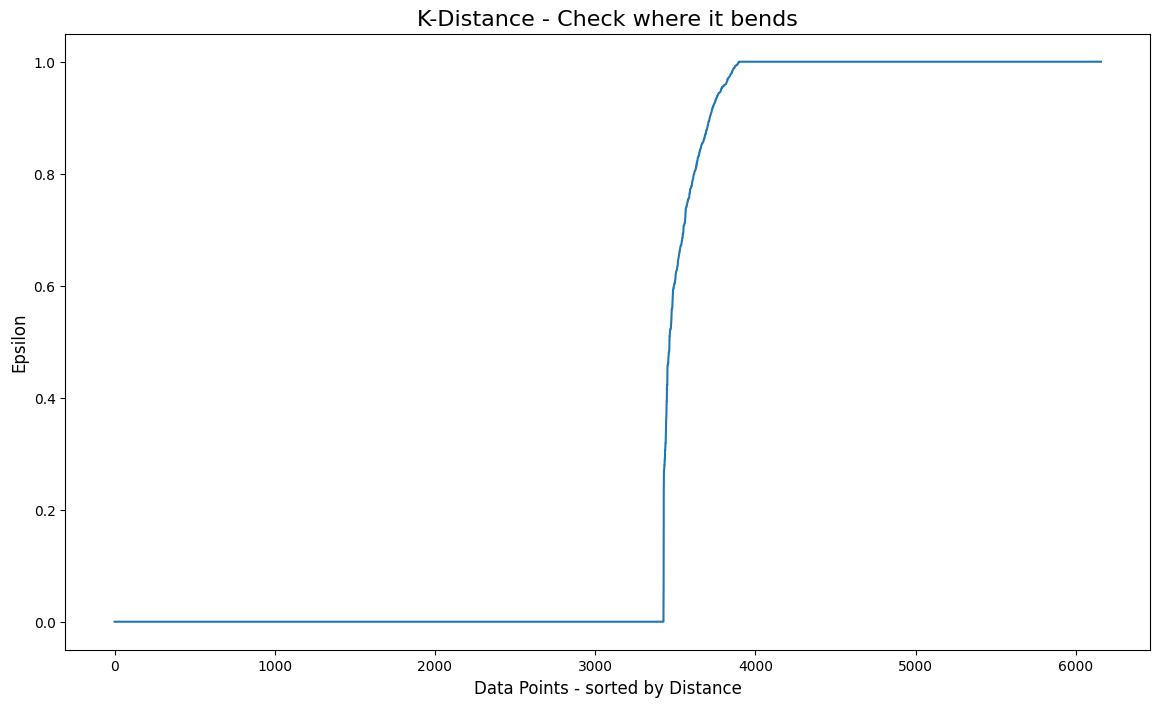

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train_count)
distances, indices = nbrs.kneighbors(X_train_count)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()

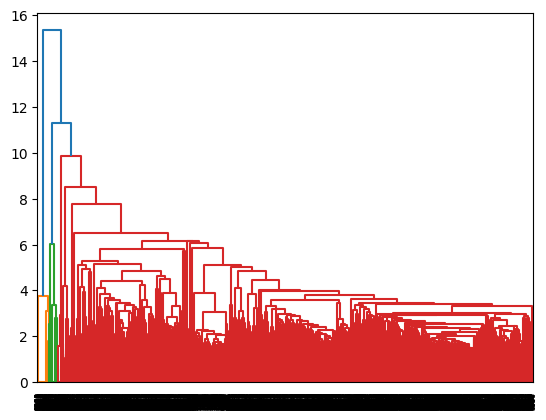

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 0 0 ... 0 0 0]


In [ ]:
#Hierarchical clustering
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

count_vect = TfidfVectorizer()
X_train_count = count_vect.fit_transform(phone_review["Reviews"])

# Compute the ward linkage using euclidean distance
linkage_data = linkage(X_train_count.toarray(), method='ward', metric='euclidean')

# Visualize the dendrogram
dendrogram(linkage_data)
plt.show()

hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(np.asarray(X_train_count.todense()))

print(labels)

In [ ]:
def ward_hierarchical_clustering(feature_matrix):

    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

linkage_matrix = ward_hierarchical_clustering(X_train_count)

print(linkage_matrix)

[[1.58000000e+02 1.26400000e+03 0.00000000e+00 2.00000000e+00]
 [1.55900000e+03 6.15800000e+03 0.00000000e+00 3.00000000e+00]
 [3.41400000e+03 6.15900000e+03 0.00000000e+00 4.00000000e+00]
 ...
 [1.22930000e+04 1.23110000e+04 9.68021727e+01 5.77300000e+03]
 [1.23070000e+04 1.23120000e+04 1.51559473e+02 6.02600000e+03]
 [1.22950000e+04 1.23130000e+04 1.98266106e+02 6.15800000e+03]]


In [ ]:
#Word2Vec & KMeans
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

n_cluster = 10

documents = phone_review["Reviews"]

word2vec_model = Word2Vec([doc.split() for doc in documents], vector_size=100, window=5, min_count=1)

# Vectorize the text data
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

train_X = np.array([vectorize(sentence) for sentence in documents])

kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init="auto").fit(train_X)
labels = kmeans.predict(train_X)

print("Cluster labels:", kmeans.labels_)

Cluster labels: [7 9 7 ... 2 2 2]


In [ ]:
#BERT & K-Means
!pip install sentence-transformers
import torch
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

n_cluster = 10

documents = phone_review["Reviews"]

model_name = "paraphrase-MiniLM-L6-v2"
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModel.from_pretrained(model_name)
model = SentenceTransformer(model_name)

# Get sentence embeddings
embeddings = model.encode(documents.tolist())

# K-means clustering
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(embeddings)

# Assign cluster labels
cluster_labels = kmeans.labels_

print("Cluster labels:", cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [7 2 7 ... 7 4 3]


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

Some notes:
k-means performed really fast compared to DBSCAN and Hierarchical clustering.
In hierarchical clustering, we cannot use sparse matrix.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I am starting to love this kind of excercise, although the timespan is limited. Pardon me for keep editing the code after the submission due. I feel like the excercises are harder than the assignments.

In my observation for the classification tasks, I noticed that removing stopwords because it returned incorrect prediction although the test scores were quite high.
Meanwhile for the clustering task, some algorithms are faster than the others.

Overall, the standar algorithms for classification and clustering are pretty easy to follow. But I struggled to understand the BERT in both tasks.

'''